# Project 11 - Working with Geocoded Data

In [7]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [9]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    #import the county shape file
    map_data = geopandas.read_file(filename = filename, 
                                   index_col = index_col)
    #rename fips code to match variable name in COVID-19 data
    map_data.rename(columns = {"State": "state"}, inplace = True)
    #combine statefips and count fips to create a single fips value
    #that indicates state and county
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace=True)
    return map_data
    

In [10]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [13]:
fips_name = "fips_code"
covid_filename = "COVID19DataAP.csv"
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                index_col = "Date", FIPS_name= fips_name)



In [14]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


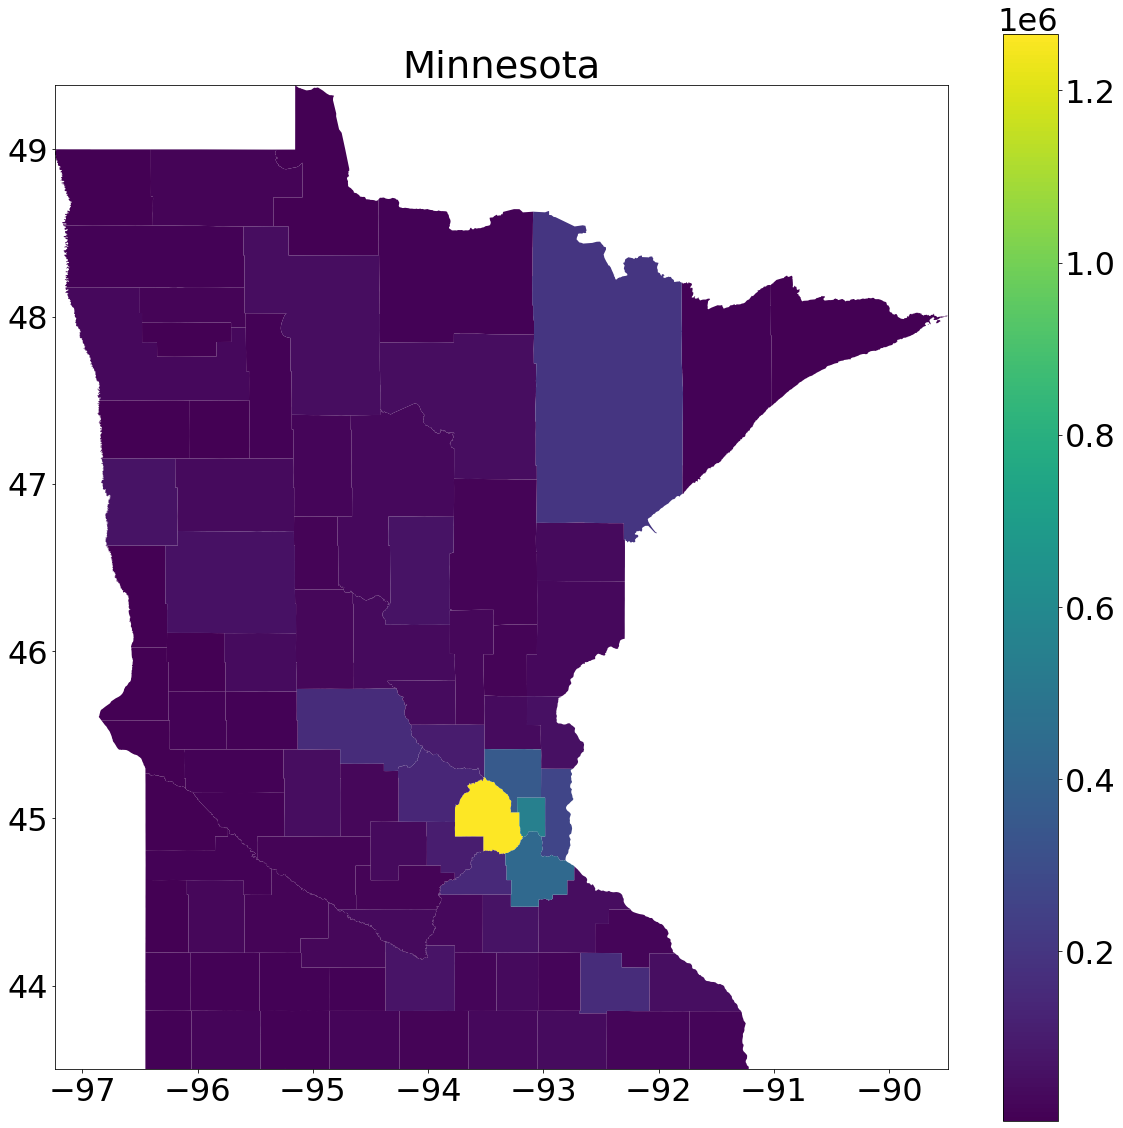

In [26]:
fig, ax = plt.subplots(figsize = (20,20))
map_data[map_data["state"] == "Minnesota"].plot(column = "Population",
                                                ax = ax,
                                                legend = True)
ax.set_title("Minnesota");

In [37]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset("associatedpress/johns-hopkins-coronavirus-case-tracker",
                              auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]

    #transform FIPS codes into integers (not floats)
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    #format the date column as datetime
    covid_data['date'] = pd.to_datetime(covid_data['date'])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    covid_data["Location"] = covid_data["location_name"] + ", " + covid_data["state_abr"]

    return covid_data

In [38]:
covid_data = import_covid_data(FIPS_name = fips_name)

/Applications/anaconda3/lib/python3.8/site-packages/datadotworld/models/dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [39]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-11-11  84056045        county        Weston  Wyoming   
          2021-11-12  84056045        county        Weston  Wyoming   
          2021-11-13  84056045        county        Weston  Wyoming   
          2021-11-14  84056045        county        Weston  Wyoming   
          2021-11-15  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-11-11            7100.0              1168   
          2021-11-12            7100.0              1175   
          2021-11-13            7100.0              1175   
          2021-11-14            7100.0              1175   
          2021-11-15            7100.0              1178   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-11-11                      16450.70                 10   
          2021-11-12                      16549.30                 10   
          2021-11-13                      16549.30                 10   
          2021-11-14                      16549.30                 10   
          2021-11-15                      16591.55                 10   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                           0.00        NaN         NaN   
          2020-01-23                           0.00        0.0         0.0   
          2020-01-24                           0.00        0.0         0.0   
          2020-01-25                           0.00        0.0         0.0   
          2020-01-26                           0.00        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-11-11                         140.85        0.0         0.0   
          2021-11-12                         140.85        7.0         0.0   
          2021-11-13                         140.85        0.0         0.0   
          2021-11-14                         140.85        0.0         0.0   
          2021-11-15                         140.85        3.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  